<a href="https://colab.research.google.com/github/jumbokh/csu1112-class/blob/main/notebooks/flags/F2379_CH04.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#第4章：開始使用神經網路：分類與迴歸問題

##4-1 二元分類範例：將電影評論分類為正評或負評

###4-1-1 IMDB資料集

####程式 4.1 載入IMDB資料集

In [1]:
from tensorflow.keras.datasets import imdb
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

17464789/17464789 [==============================] - 1s 0us/step


In [2]:
train_data[0]

[1,
 14,
 22,
 16,
 43,
 530,
 973,
 1622,
 1385,
 65,
 458,
 4468,
 66,
 3941,
 4,
 173,
 36,
 256,
 5,
 25,
 100,
 43,
 838,
 112,
 50,
 670,
 2,
 9,
 35,
 480,
 284,
 5,
 150,
 4,
 172,
 112,
 167,
 2,
 336,
 385,
 39,
 4,
 172,
 4536,
 1111,
 17,
 546,
 38,
 13,
 447,
 4,
 192,
 50,
 16,
 6,
 147,
 2025,
 19,
 14,
 22,
 4,
 1920,
 4613,
 469,
 4,
 22,
 71,
 87,
 12,
 16,
 43,
 530,
 38,
 76,
 15,
 13,
 1247,
 4,
 22,
 17,
 515,
 17,
 12,
 16,
 626,
 18,
 2,
 5,
 62,
 386,
 12,
 8,
 316,
 8,
 106,
 5,
 4,
 2223,
 5244,
 16,
 480,
 66,
 3785,
 33,
 4,
 130,
 12,
 16,
 38,
 619,
 5,
 25,
 124,
 51,
 36,
 135,
 48,
 25,
 1415,
 33,
 6,
 22,
 12,
 215,
 28,
 77,
 52,
 5,
 14,
 407,
 16,
 82,
 2,
 8,
 4,
 107,
 117,
 5952,
 15,
 256,
 4,
 2,
 7,
 3766,
 5,
 723,
 36,
 71,
 43,
 530,
 476,
 26,
 400,
 317,
 46,
 7,
 4,
 2,
 1029,
 13,
 104,
 88,
 4,
 381,
 15,
 297,
 98,
 32,
 2071,
 56,
 26,
 141,
 6,
 194,
 7486,
 18,
 4,
 226,
 22,
 21,
 134,
 476,
 26,
 480,
 5,
 144,
 30,
 5535,
 18,

In [3]:
train_labels[0]

1

In [4]:
max([max(sequence) for sequence in train_data])

9999

#### 程式 4.2 將數字還原成英文單字

In [5]:
word_index = imdb.get_word_index()
reverse_word_index = dict(
    [(value, key) for (key, value) in word_index.items()])
decoded_review = " ".join(
    [reverse_word_index.get(i - 3, "?") for i in train_data[0]])

1641221/1641221 [==============================] - 0s 0us/step


###4-1-2 準備資料

####程式 4.3 使用multi-hot encoding編碼整數串列

In [6]:
import numpy as np
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        for j in sequence:
            results[i, j] = 1.
    return results
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [7]:
x_train[0]

array([0., 1., 1., ..., 0., 0., 0.])

In [8]:
y_train = np.asarray(train_labels).astype("float32")
y_test = np.asarray(test_labels).astype("float32")

####小編補充

In [9]:
arr = np.zeros((2,4))
arr.ndim

2

In [10]:
arr.shape

(2, 4)

###4-1-3 建立神經網路

####程式 4.4 模型定義

In [11]:
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])

#### 程式 4.5 編譯模型

In [12]:
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])

###4-1-4 驗證神經網路模型

####程式 4.6 建立驗證資料集

In [13]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

#### 程式 4.7 訓練模型

In [14]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
30/30 [==============================] - 3s 55ms/step - loss: 0.5082 - accuracy: 0.7875 - val_loss: 0.4076 - val_accuracy: 0.8441
Epoch 2/20
30/30 [==============================] - 1s 38ms/step - loss: 0.3095 - accuracy: 0.9037 - val_loss: 0.3207 - val_accuracy: 0.8758
Epoch 3/20
30/30 [==============================] - 1s 37ms/step - loss: 0.2258 - accuracy: 0.9269 - val_loss: 0.2777 - val_accuracy: 0.8910
Epoch 4/20
30/30 [==============================] - 1s 37ms/step - loss: 0.1788 - accuracy: 0.9397 - val_loss: 0.2725 - val_accuracy: 0.8908
Epoch 5/20
30/30 [==============================] - 1s 37ms/step - loss: 0.1452 - accuracy: 0.9527 - val_loss: 0.2853 - val_accuracy: 0.8852
Epoch 6/20
30/30 [==============================] - 1s 37ms/step - loss: 0.1197 - accuracy: 0.9615 - val_loss: 0.3001 - val_accuracy: 0.8824
Epoch 7/20
30/30 [==============================] - 1s 36ms/step - loss: 0.0987 - accuracy: 0.9697 - val_loss: 0.3238 - val_accuracy: 0.8809
Epoch 8/20
30

In [15]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

####程式 4.8 繪製訓練與驗證損失

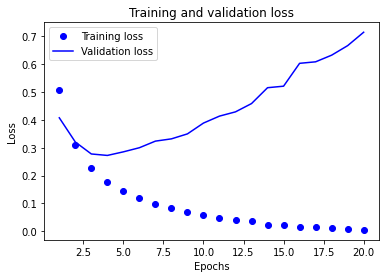

In [16]:
import matplotlib.pyplot as plt
history_dict = history.history
loss_values = history_dict["loss"]
val_loss_values = history_dict["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

####程式 4.9 繪製訓練和驗證準確度

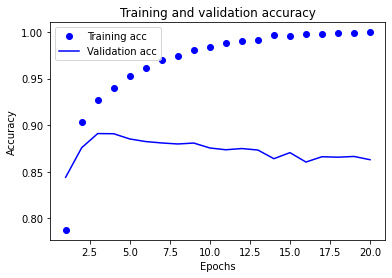

In [17]:
plt.clf()
acc = history_dict["accuracy"]
val_acc = history_dict["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

####程式 4.10 重新開始訓練模型

In [18]:
model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
       loss="binary_crossentropy",
       metrics=["accuracy"])
model.fit(x_train, y_train, epochs=4, batch_size=512)
results = model.evaluate(x_test, y_test)

Epoch 1/4
49/49 [==============================] - 2s 30ms/step - loss: 0.4460 - accuracy: 0.8114
Epoch 2/4
49/49 [==============================] - 1s 29ms/step - loss: 0.2547 - accuracy: 0.9110
Epoch 3/4
49/49 [==============================] - 1s 29ms/step - loss: 0.1967 - accuracy: 0.9298
Epoch 4/4
782/782 [==============================] - 2s 3ms/step - loss: 0.3300 - accuracy: 0.8698


In [19]:
results

[0.33004820346832275, 0.8697999715805054]

###4-1-5 使用訓練完成的神經網路對新資料進行預測

In [20]:
model.predict(x_test)

782/782 [==============================] - 2s 2ms/step


array([[0.12094196],
       [0.9995913 ],
       [0.3947502 ],
       ...,
       [0.07692959],
       [0.0345986 ],
       [0.43474644]], dtype=float32)

### Further experiments

### Wrapping up

##4-2 分類數位新聞專欄：多類別分類範例

###4-2-1 路透社資料集

####程式 4.11 載入路透社資料集

In [21]:
from tensorflow.keras.datasets import reuters
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)

2110848/2110848 [==============================] - 0s 0us/step


In [22]:
len(train_data)

8982

In [23]:
len(test_data)

2246

In [24]:
train_data[10]

[1,
 245,
 273,
 207,
 156,
 53,
 74,
 160,
 26,
 14,
 46,
 296,
 26,
 39,
 74,
 2979,
 3554,
 14,
 46,
 4689,
 4329,
 86,
 61,
 3499,
 4795,
 14,
 61,
 451,
 4329,
 17,
 12]

####程式 4.12 將新聞專欄解碼回文字

In [25]:
word_index = reuters.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
decoded_newswire = " ".join([reverse_word_index.get(i - 3, "?") for i in
    train_data[0]])

550378/550378 [==============================] - 0s 0us/step


In [26]:
train_labels[10]

3

###4-2-2 準備資料

###程式 4.13 將資料加以編碼

####程式 4.13 將資料加以編碼

In [27]:
import numpy as np
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

####程式 4.14 將標籤加以編碼

In [28]:
def to_one_hot(labels, dimension=46):
    results = np.zeros((len(labels), dimension))
    for i, label in enumerate(labels):
        results[i, label] = 1.
    return results
y_train = to_one_hot(train_labels)
y_test = to_one_hot(test_labels)

In [29]:
from tensorflow.keras.utils import to_categorical
y_train = to_categorical(train_labels)
y_test = to_categorical(test_labels)

###4-2-3 建立神經模型

####程式 4.15 定義模型

In [30]:
model = keras.Sequential([
    layers.Dense(64, activation="relu"),
    layers.Dense(64, activation="relu"),
    layers.Dense(46, activation="softmax")
])

####程式 4.16 編譯模型

In [31]:
model.compile(optimizer="rmsprop",
       loss="categorical_crossentropy",
       metrics=["accuracy"])

###4-2-4 驗證模型表現

####程式 4.17 建立驗證資料集

In [32]:
x_val = x_train[:1000]
partial_x_train = x_train[1000:]
y_val = y_train[:1000]
partial_y_train = y_train[1000:]

####程式 4.18 訓練模型

In [33]:
history = model.fit(partial_x_train,
           partial_y_train,
           epochs=20,
           batch_size=512,
           validation_data=(x_val, y_val))

Epoch 1/20
16/16 [==============================] - 2s 68ms/step - loss: 2.5062 - accuracy: 0.5469 - val_loss: 1.6620 - val_accuracy: 0.6690
Epoch 2/20
16/16 [==============================] - 1s 55ms/step - loss: 1.3846 - accuracy: 0.7165 - val_loss: 1.2862 - val_accuracy: 0.7130
Epoch 3/20
16/16 [==============================] - 1s 55ms/step - loss: 1.0374 - accuracy: 0.7756 - val_loss: 1.1193 - val_accuracy: 0.7450
Epoch 4/20
16/16 [==============================] - 1s 52ms/step - loss: 0.8166 - accuracy: 0.8207 - val_loss: 1.0177 - val_accuracy: 0.7800
Epoch 5/20
16/16 [==============================] - 1s 56ms/step - loss: 0.6499 - accuracy: 0.8583 - val_loss: 0.9584 - val_accuracy: 0.7990
Epoch 6/20
16/16 [==============================] - 1s 53ms/step - loss: 0.5204 - accuracy: 0.8893 - val_loss: 0.9111 - val_accuracy: 0.8140
Epoch 7/20
16/16 [==============================] - 1s 56ms/step - loss: 0.4175 - accuracy: 0.9146 - val_loss: 0.9172 - val_accuracy: 0.7960
Epoch 8/20
16

####程式 4.19 繪製訓練和驗證損失

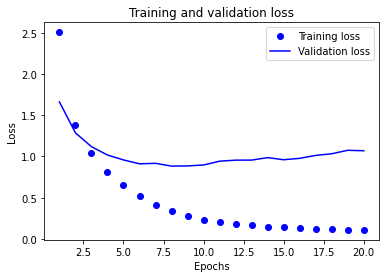

In [34]:
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

####程式 4.20 繪製訓練和驗證準確度

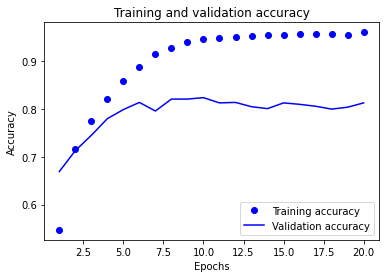

In [35]:
plt.clf()
acc = history.history["accuracy"]
val_acc = history.history["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training accuracy")
plt.plot(epochs, val_acc, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

####程式 4.21 從頭開始訓練模型

In [36]:
model = keras.Sequential([
  layers.Dense(64, activation="relu"),
  layers.Dense(64, activation="relu"),
  layers.Dense(46, activation="softmax")
])
model.compile(optimizer="rmsprop",
       loss="categorical_crossentropy",
       metrics=["accuracy"])
model.fit(x_train,
     y_train,
     epochs=9,
     batch_size=512)
results = model.evaluate(x_test, y_test)

Epoch 1/9
18/18 [==============================] - 2s 51ms/step - loss: 2.5377 - accuracy: 0.5498
Epoch 2/9
18/18 [==============================] - 1s 51ms/step - loss: 1.3374 - accuracy: 0.7165
Epoch 3/9
18/18 [==============================] - 1s 49ms/step - loss: 0.9926 - accuracy: 0.7867
Epoch 4/9
18/18 [==============================] - 1s 51ms/step - loss: 0.7738 - accuracy: 0.8377
Epoch 5/9
18/18 [==============================] - 1s 50ms/step - loss: 0.6160 - accuracy: 0.8716
Epoch 6/9
18/18 [==============================] - 1s 50ms/step - loss: 0.4876 - accuracy: 0.9005
Epoch 7/9
18/18 [==============================] - 1s 49ms/step - loss: 0.3970 - accuracy: 0.9159
Epoch 8/9
18/18 [==============================] - 1s 49ms/step - loss: 0.3235 - accuracy: 0.9287
Epoch 9/9
71/71 [==============================] - 0s 4ms/step - loss: 0.9474 - accuracy: 0.7961


In [37]:
results

[0.9473503828048706, 0.7960819005966187]

In [38]:
import copy
test_labels_copy = copy.copy(test_labels)
np.random.shuffle(test_labels_copy)
hits_array = np.array(test_labels) == np.array(test_labels_copy)
hits_array.mean()

0.17764915405164738

###4-2-5 對新資料進行預測

In [39]:
predictions = model.predict(x_test)

71/71 [==============================] - 0s 4ms/step


In [40]:
predictions[0].shape

(46,)

In [41]:
np.sum(predictions[0])

0.99999994

In [42]:
np.argmax(predictions[0])

4

###4-2-6 處理標籤與損失的另一種方式

In [43]:
y_train = np.array(train_labels)
y_test = np.array(test_labels)

In [44]:
model.compile(optimizer="rmsprop",
       loss="sparse_categorical_crossentropy",
       metrics=["accuracy"])

###4-2-7 擁有足夠大型中間層的重要性

####程式 4.22 具有資訊瓶頸的模型

In [45]:
model = keras.Sequential([
    layers.Dense(64, activation="relu"),
    layers.Dense(4, activation="relu"),
    layers.Dense(46, activation="softmax")
])
model.compile(optimizer="rmsprop",
       loss="categorical_crossentropy",
       metrics=["accuracy"])
model.fit(partial_x_train,
     partial_y_train,
     epochs=20,
     batch_size=128,
     validation_data=(x_val, y_val))

Epoch 1/20
63/63 [==============================] - 2s 23ms/step - loss: 3.0004 - accuracy: 0.3657 - val_loss: 2.2908 - val_accuracy: 0.4030
Epoch 2/20
63/63 [==============================] - 1s 19ms/step - loss: 1.8902 - accuracy: 0.5813 - val_loss: 1.6811 - val_accuracy: 0.5910
Epoch 3/20
63/63 [==============================] - 1s 20ms/step - loss: 1.3902 - accuracy: 0.6428 - val_loss: 1.3998 - val_accuracy: 0.6340
Epoch 4/20
63/63 [==============================] - 1s 20ms/step - loss: 1.1541 - accuracy: 0.7036 - val_loss: 1.2906 - val_accuracy: 0.7100
Epoch 5/20
63/63 [==============================] - 1s 19ms/step - loss: 0.9946 - accuracy: 0.7670 - val_loss: 1.2571 - val_accuracy: 0.7210
Epoch 6/20
63/63 [==============================] - 1s 20ms/step - loss: 0.8851 - accuracy: 0.7844 - val_loss: 1.2321 - val_accuracy: 0.7290
Epoch 7/20
63/63 [==============================] - 1s 19ms/step - loss: 0.8056 - accuracy: 0.7982 - val_loss: 1.2260 - val_accuracy: 0.7220
Epoch 8/20
63

##4-3 預測房價：迴歸範例

###4-3-1 波士頓住房價格資料集

####程式 4.23 載入波士頓住房價格資料集

In [46]:
from tensorflow.keras.datasets import boston_housing
(train_data, train_targets), (test_data, test_targets) = boston_housing.load_data()

57026/57026 [==============================] - 0s 0us/step


In [47]:
train_data.shape

(404, 13)

In [48]:
test_data.shape

(102, 13)

In [49]:
train_targets

array([15.2, 42.3, 50. , 21.1, 17.7, 18.5, 11.3, 15.6, 15.6, 14.4, 12.1,
       17.9, 23.1, 19.9, 15.7,  8.8, 50. , 22.5, 24.1, 27.5, 10.9, 30.8,
       32.9, 24. , 18.5, 13.3, 22.9, 34.7, 16.6, 17.5, 22.3, 16.1, 14.9,
       23.1, 34.9, 25. , 13.9, 13.1, 20.4, 20. , 15.2, 24.7, 22.2, 16.7,
       12.7, 15.6, 18.4, 21. , 30.1, 15.1, 18.7,  9.6, 31.5, 24.8, 19.1,
       22. , 14.5, 11. , 32. , 29.4, 20.3, 24.4, 14.6, 19.5, 14.1, 14.3,
       15.6, 10.5,  6.3, 19.3, 19.3, 13.4, 36.4, 17.8, 13.5, 16.5,  8.3,
       14.3, 16. , 13.4, 28.6, 43.5, 20.2, 22. , 23. , 20.7, 12.5, 48.5,
       14.6, 13.4, 23.7, 50. , 21.7, 39.8, 38.7, 22.2, 34.9, 22.5, 31.1,
       28.7, 46. , 41.7, 21. , 26.6, 15. , 24.4, 13.3, 21.2, 11.7, 21.7,
       19.4, 50. , 22.8, 19.7, 24.7, 36.2, 14.2, 18.9, 18.3, 20.6, 24.6,
       18.2,  8.7, 44. , 10.4, 13.2, 21.2, 37. , 30.7, 22.9, 20. , 19.3,
       31.7, 32. , 23.1, 18.8, 10.9, 50. , 19.6,  5. , 14.4, 19.8, 13.8,
       19.6, 23.9, 24.5, 25. , 19.9, 17.2, 24.6, 13

###4-3-2 準備資料集

####程式 4.24 正規化資料

In [50]:
mean = train_data.mean(axis=0)
train_data -= mean
std = train_data.std(axis=0)
train_data /= std
test_data -= mean
test_data /= std

###4-3-3 建立模型

####程式 4.25 模型定義

In [51]:
def build_model():
    model = keras.Sequential([
        layers.Dense(64, activation="relu"),
        layers.Dense(64, activation="relu"),
        layers.Dense(1)
    ])
    model.compile(optimizer="rmsprop", loss="mse", metrics=["mae"])
    return model

###4-3-4 使用K折(K-fold)驗證來驗證模型的成效

####程式 4.26 K折驗證

In [52]:
k = 4
num_val_samples = len(train_data) // k
num_epochs = 100
all_scores = []
for i in range(k):
    print(f"Processing fold #{i}")
    val_data = train_data[i * num_val_samples: (i + 1) * num_val_samples]
    val_targets = train_targets[i * num_val_samples: (i + 1) * num_val_samples]
    partial_train_data = np.concatenate(
        [train_data[:i * num_val_samples],
         train_data[(i + 1) * num_val_samples:]],
        axis=0)
    partial_train_targets = np.concatenate(
        [train_targets[:i * num_val_samples],
         train_targets[(i + 1) * num_val_samples:]],
        axis=0)
    model = build_model()
    model.fit(partial_train_data, partial_train_targets,
         epochs=num_epochs, batch_size=16, verbose=0)
    val_mse, val_mae = model.evaluate(val_data, val_targets, verbose=0)
    all_scores.append(val_mae)

Processing fold #0
Processing fold #1
Processing fold #2
Processing fold #3


In [53]:
all_scores

[1.9935095310211182,
 2.6283607482910156,
 2.4086661338806152,
 2.4682979583740234]

In [54]:
np.mean(all_scores)

2.374708592891693

####程式 4.27 儲存每折的驗證記錄

In [55]:
num_epochs = 500
all_mae_histories = []
for i in range(k):
    print(f"Processing fold #{i}")
    val_data = train_data[i * num_val_samples: (i + 1) * num_val_samples]
    val_targets = train_targets[i * num_val_samples: (i + 1) * num_val_samples]
    partial_train_data = np.concatenate(
        [train_data[:i * num_val_samples],
         train_data[(i + 1) * num_val_samples:]],
        axis=0)
    partial_train_targets = np.concatenate(
        [train_targets[:i * num_val_samples],
         train_targets[(i + 1) * num_val_samples:]],
        axis=0)
    model = build_model()
    history = model.fit(partial_train_data, partial_train_targets,
               validation_data=(val_data, val_targets),
               epochs=num_epochs, batch_size=16, verbose=0)
    mae_history = history.history["val_mae"]
    all_mae_histories.append(mae_history)

Processing fold #0
Processing fold #1
Processing fold #2
Processing fold #3


####程式 4.28 建立連續平均K折驗證分數的歷史

In [56]:
average_mae_history = [
    np.mean([x[i] for x in all_mae_histories]) for i in range(num_epochs)]

####程式 4.29 繪製驗證分數

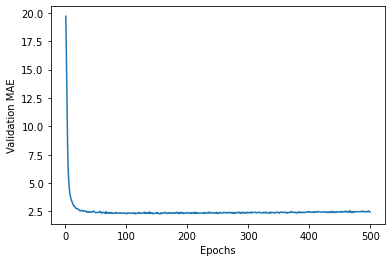

In [57]:
plt.plot(range(1, len(average_mae_history) + 1), average_mae_history)
plt.xlabel("Epochs")
plt.ylabel("Validation MAE")
plt.show()

####程式 4.30 排除前10個資料點，繪製驗證分數

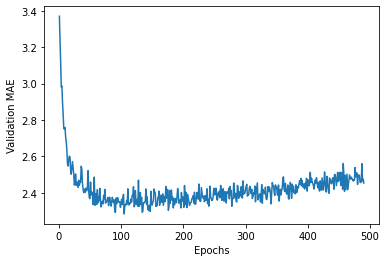

In [58]:
truncated_mae_history = average_mae_history[10:]
plt.plot(range(1, len(truncated_mae_history) + 1), truncated_mae_history)
plt.xlabel("Epochs")
plt.ylabel("Validation MAE")
plt.show()

####程式 4.31 訓練最終模型

In [59]:
model = build_model()
model.fit(train_data, train_targets,
     epochs=130, batch_size=16, verbose=0)
test_mse_score, test_mae_score = model.evaluate(test_data, test_targets)

4/4 [==============================] - 0s 4ms/step - loss: 18.2755 - mae: 2.6173


In [60]:
test_mae_score

2.617258071899414

###4-3-5 在新資料上進行預測

In [61]:
predictions = model.predict(test_data)
predictions[0]

4/4 [==============================] - 0s 3ms/step


array([8.667441], dtype=float32)